In [ ]:
from sympy.solvers import solve_linear_system #Para resolver el sistema lineal
from sympy import Symbol #Para definir los simbolos
import sympy as sym 
from scipy.signal import lti 
from scipy.fftpack import fft, fftfreq, fftshift #Transformada, frecuencias y centrado
import matplotlib.pyplot as plt #Para graficar
from scipy import signal
from scipy.integrate import cumtrapz #Para integrar con el metodo de trapecios acumulando
import numpy as np
import matplotlib.pyplot as plt
from sympy.matrices import Matrix #Trabajo con matrices
import warnings
from sympy import Symbol
from scipy.fftpack import fft, fftshift, ifft
from scipy.fftpack import fftfreq
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore")

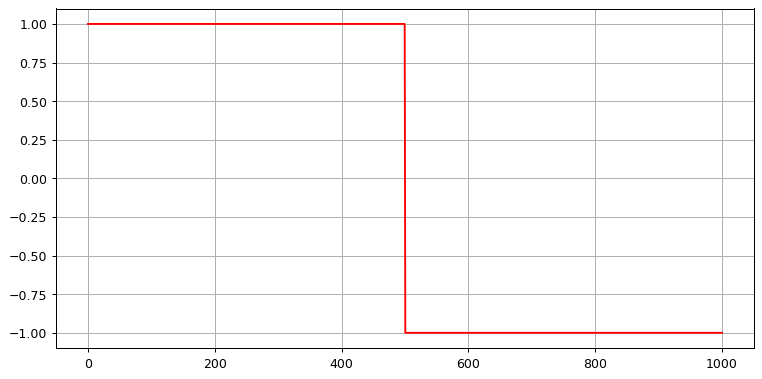

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

amp=1
amp1=-1

symbols=2


pul=np.random.choice([amp,amp1],size=symbols, p=[0.5,0.5])
pul=pul.astype('float')
dur=512
pul=np.concatenate([[i]*dur for i in pul])
pul.shape
tn=np.linspace(0, 1000, len(pul))

plt.figure(figsize=(10,5), dpi=90)
plt.plot(tn, pul, color='r')
#plt.xlim(0,1000)
plt.grid()

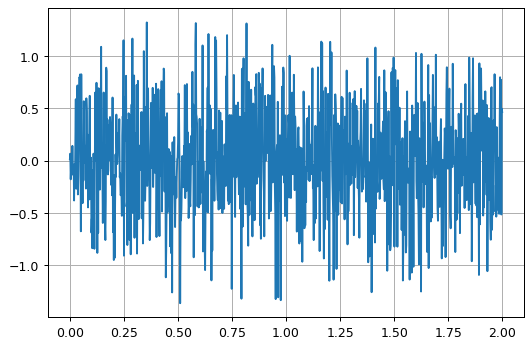

In [ ]:
t = np.linspace(0, symbols, len(pul))
ruido = np.random.normal(0, 0.5, len(pul))
plt.figure(figsize=(15,10), dpi=90)
plt.subplot(221)
plt.plot(t, ruido)
plt.grid(True)

SLIT

In [ ]:
R1=2200
R2=1000#se mueve para ajustar el filtro(la aleatoriedad del ruido)
#C1 = 1*10**-3
C1=33*10**-3#afecta la  funcion de correlacion(calidad del ruido)


num = [-C1*R1, -1] #Lo extraigo de num_coeffs
den = [-C1*R1 -C1*R2, -1]
num, den

([-72.60000000000001, -1], [-105.60000000000001, -1])

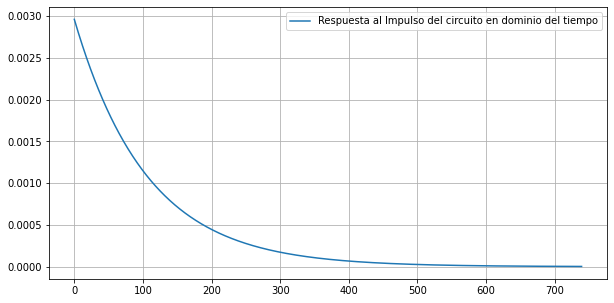

In [ ]:
lti_system = lti(num, den)   #LTI

t5, h = lti_system.impulse(N=1000) 

plt.figure(figsize=(10,5))
plt.plot(t5,h,label='Respuesta al Impulso del circuito en dominio del tiempo')

plt.grid()
plt.legend()

No handles with labels found to put in legend.


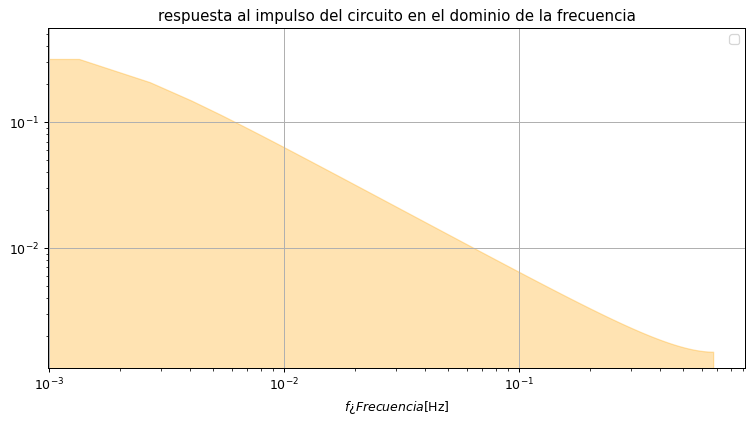

In [ ]:
from sympy.solvers import solve_linear_system #Para resolver el sistema lineal
from sympy import Symbol #Para definir los simbolos
import sympy as sym 
from scipy.signal import lti 
from scipy.fftpack import fft, fftfreq, fftshift #Transformada, frecuencias y centrado
import matplotlib.pyplot as plt #Para graficar
from scipy import signal
from scipy.integrate import cumtrapz #Para integrar con el metodo de trapecios acumulando
import numpy as np
from sympy.matrices import Matrix #Trabajo con matrices
import warnings
Fs=1700
vffpr = np.fft.fftfreq(len(h),1/Fs) #calculo vector de frecuencias
fftsafpr= np.fft.fft(h) #cálculo FFT
ftt=fftshift(np.abs(fft(h)))
ver=fftshift(fftfreq(h.shape[0], t5[1]-t5[0]))
plt.figure(figsize=(10,5), dpi=90)
plt.fill_between(ver,ftt, 0, color='orange', alpha=0.3, label='')
plt.title(r'respuesta al impulso del circuito en el dominio de la frecuencia')
plt.xlabel(r'$f¿Frecuencia$[Hz]')

plt.semilogx()
plt.semilogy()
#plt.ylim(0,10000)
plt.grid(True)
plt.legend()
plt.show()

Señal por el SLIT

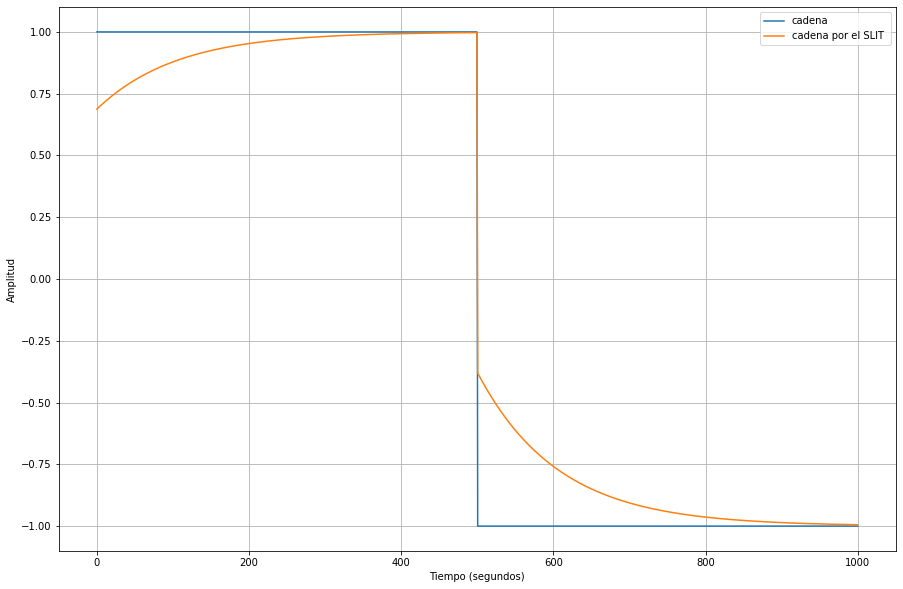

In [ ]:
_,puls,_= lti_system.output(pul, tn)
y, cnt = np.unique(puls, return_counts=True)
plt.figure(figsize=(15,10))

plt.plot(tn, pul,label="cadena")
plt.plot(tn, puls,label="cadena por el SLIT ")
plt.legend()
plt.xlabel("Tiempo (segundos)")
plt.ylabel("Amplitud")
#plt.xlim(0, 0.2)
plt.grid()


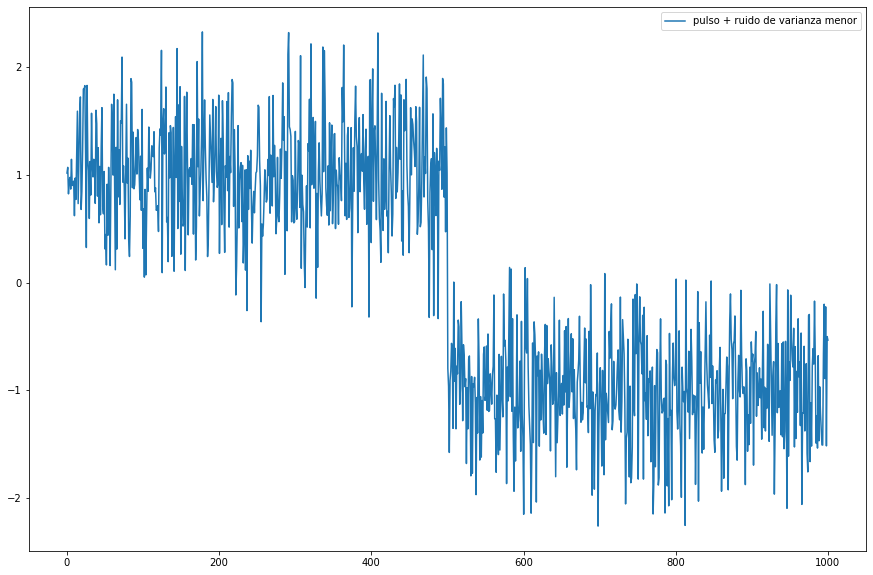

In [ ]:
newpul0=pul+ruido
#newpul=puls+ruido

plt.figure(figsize=(15,10))
#plt.xlim(0,1)
plt.plot(tn,newpul0, label='pulso + ruido de varianza menor')
#plt.plot(tn,newpul, label='pulso filtrado + ruido de varianza menor')
plt.legend()

In [ ]:
from ipywidgets import interact
N=1024
w=newpul0
v=np.zeros(N)
l=np.zeros(N)
@interact(um=(-1,1))
def umbral(um=0):
  for j in range(0,N-1):
    if (w[j]>um):
      v[j]= 1
    if (w[j]<=um):
      l[j]=-1


l=np.mean(l)
v=np.mean(v)
u=(l+v)/2
print(u)

#plt.figure(figsize=(10,8))
#plt.plot(v, color='r')
#plt.plot(pul)
#plt.grid()

interactive(children=(IntSlider(value=0, description='um', max=1, min=-1), Output()), _dom_classes=('widget-in…

-0.00048828125


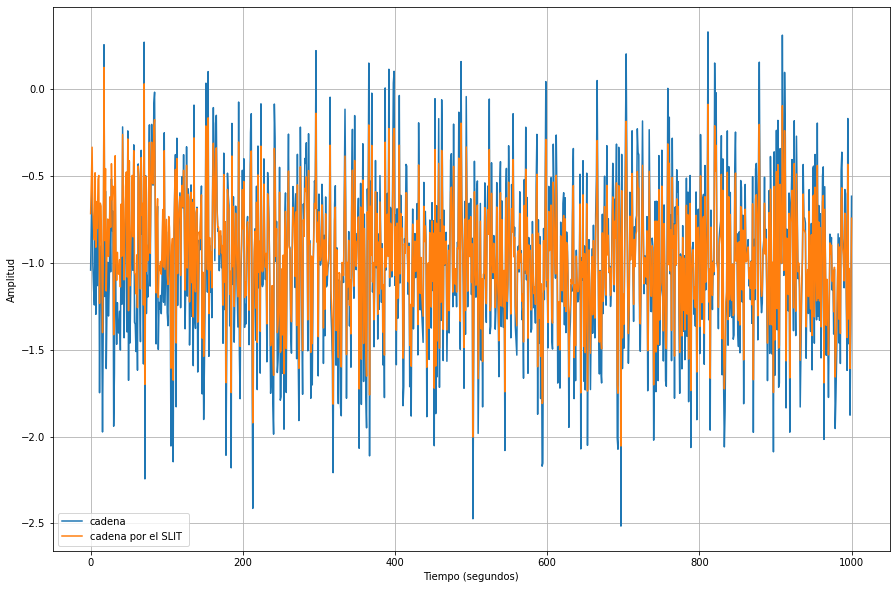

In [ ]:
_,pulrui,_= lti_system.output(newpul0, tn)
y, cnt = np.unique(puls, return_counts=True)
plt.figure(figsize=(15,10))

plt.plot(tn, newpul0,label="cadena")
plt.plot(tn, pulrui,label="cadena por el SLIT ")
plt.legend()
plt.xlabel("Tiempo (segundos)")
plt.ylabel("Amplitud")
#plt.xlim(0, 0.2)
plt.grid()

In [ ]:
from ipywidgets import interact
N=1024
w=pulrui
v=np.zeros(N)
l=np.zeros(N)
@interact(um=(-1,1))
def umbral(um=0):
  for j in range(0,N-1):
    if (w[j]<um):
      v[j]=1
    if (w[j]<=um):
      l[j]=-1


l=np.mean(l)
v=np.mean(v)
u=(l+v)/2
print(u)
#plt.figure(figsize=(10,8))
#plt.plot(u, color='r')
#plt.grid()

interactive(children=(IntSlider(value=0, description='um', max=1, min=-1), Output()), _dom_classes=('widget-in…

0.0


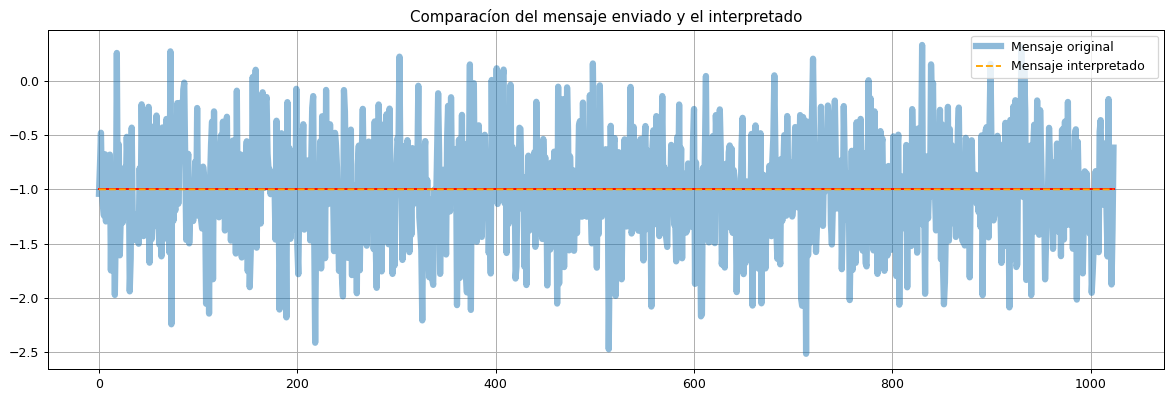

In [ ]:
d_a=[]#señal interpretada vacía

for j in newpul0.reshape(newpul0.shape[0], -1):
    if np.sum((j-(pul.min()))**2) > np.sum((j-(pul.max()))**2):#Estadistica comparativa de la energetica en el espacio euclideo para procesos aleatorios
        d_a.append(pul.max())
    else: 
        d_a.append(pul.min())



ms_orig=newpul0[::1] 

plt.figure(figsize=(16,5),dpi=90)

plt.title('Comparacíon del mensaje enviado y el interpretado')
plt.plot(range(len(ms_orig)),ms_orig,linewidth=5,alpha=0.5,label='Mensaje original')
plt.plot(range(len(d_a)),pul,color='red')
plt.step(range(len(d_a)),d_a,'--',color='orange',label='Mensaje interpretado  ')
plt.legend(loc=1)
#plt.xlim(0,100)
plt.grid()
plt.show()


In [ ]:
lñ=np.zeros(len(d_a))
for i in range(0,len(d_a)):
   lñ[i]=d_a[i]



In [ ]:
pñ=np.zeros(len(d_a))
for i in range(0, len(d_a)):
  if (lñ[i]==pul[i]):
   pñ[i]=1
  else:
   pñ[i]=0


In [ ]:
v=pñ[pñ==1]
p=pñ[pñ==0]
pe=len(p)/len(pñ)
print(len(v))
print(len(p))
print("error:", pe*100,"%")

1005
19
error: 1.85546875 %


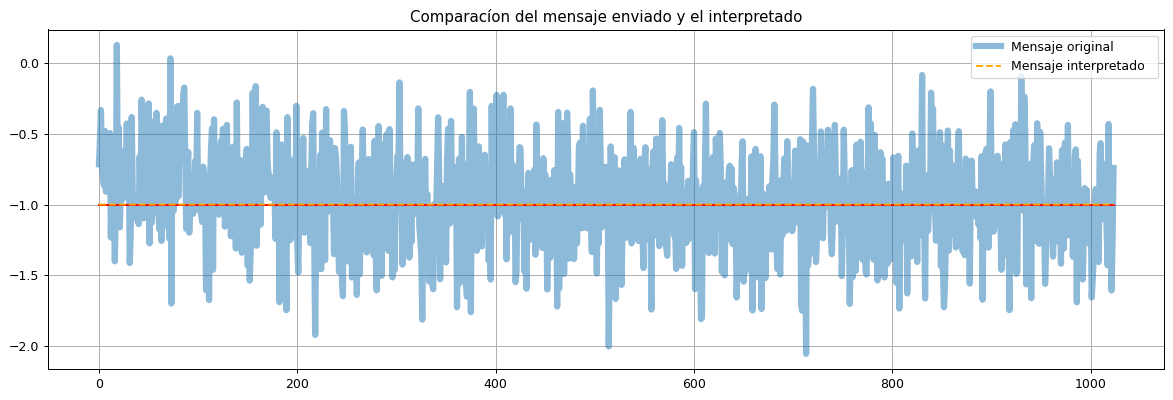

In [ ]:
d_b=[]#señal interpretada vacía

for j in pulrui.reshape(pulrui.shape[0], -1):
    if np.sum((j-(pul.min()))**2) > np.sum((j-(pul.max()))**2):#Estadistica comparativa de la energetica en el espacio euclideo para procesos aleatorios
        d_b.append(pul.max())
    else: 
        d_b.append(pul.min())



ms_orig=pulrui[::1] 

plt.figure(figsize=(16,5),dpi=90)

plt.title('Comparacíon del mensaje enviado y el interpretado')
plt.plot(range(len(ms_orig)),ms_orig,linewidth=5,alpha=0.5,label='Mensaje original')
plt.plot(range(len(d_b)),pul,color='red')
plt.step(range(len(d_b)),d_b,'--',color='orange',label='Mensaje interpretado  ')
plt.legend(loc=1)
#plt.xlim(0,100)
plt.grid()
plt.show()

In [ ]:
lñ=np.zeros(len(d_b))
for i in range(0,len(d_b)):
   lñ[i]=d_b[i]

In [ ]:
pñ=np.zeros(len(d_b))
for i in range(0, len(d_b)):
  if (lñ[i]==pul[i]):
   pñ[i]=1
  else:
   pñ[i]=0

In [ ]:
v=pñ[pñ==1]
p=pñ[pñ==0]
pe=len(p)/len(pñ)
print(len(v))
print(len(p))
print("error:", pe*100,"%")

1024
0
error: 0.0 %


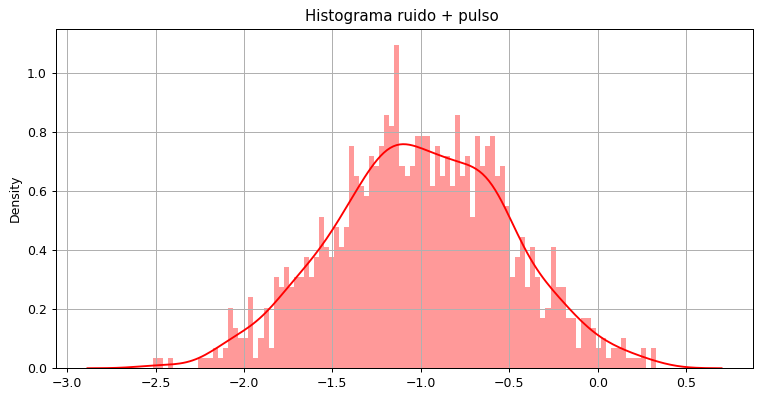

In [ ]:
import seaborn as sns, numpy as np
plt.figure(figsize=(10,5), dpi=90)
sns.distplot(newpul0, bins=100,color='r')
plt.title("Histograma ruido + pulso ")
plt.grid()
plt.show()

In [ ]:
from scipy.integrate import quad
import matplotlib.pyplot as plt
import scipy.stats
import numpy as np
from ipywidgets import interact
   
import os
    
def clearConsole():
      command = 'clear'
      if os.name in ('nt', 'dos'):  # If Machine is running on Windows, use cls\n",
          command = 'cls'
      os.system(command)
clearConsole()
error = []

x_min = - 4
x_max = 4
    
x = np.linspace(x_min, x_max, 1000)
# N(mean1,std1)\n",
mean = -1
std = np.std(newpul0)

# Normal pdf \n",
def normal_distribution_function_r(x):
        value = scipy.stats.norm.pdf(x, mean, std)
        return value
   
def normal_distribution_function_l(x):
        value = scipy.stats.norm.pdf(x, -mean, std)
        return value
 
# Graph limits\n",

# N1(mean,std)\n",
y1 = scipy.stats.norm.pdf(x,mean,std)
# N0(-mean,std)\n",
y0 = scipy.stats.norm.pdf(x,-mean,std)
  

   
   
umbral = x.copy()
error = []
for u in umbral: 
  # --------------------- P(a_0/a_1) -----------------------#\n",
  xinf0 = mean - 6 * std
  res1, err = quad(normal_distribution_function_l, xinf0, u)
  
  # --------------------- P(a_1/a_0) -----------------------#\n",
  
  xinf_1 =  mean + 6 * std
  res0, err = quad(normal_distribution_function_r, u, xinf_1)
    
  error.append(res1 + res0)
   

     
#@interact(children=(FloatSlider(value=0.0, description='u', max=9.42477796076938, min=-9.42477796076938)))

   
@interact(u=(umbral[0], umbral[-1], 0.1))
def umbral_interact(u=0):
    plt.figure(figsize=(16, 9), dpi=90)    
    ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
    plt.grid(True)
    
    plt.fill_between(x[x>u], y1[x>u], color='C0', zorder=90)
    plt.fill_between(x[x>u], y0[x>u], color='C0', zorder=90)
    
    plt.fill_between(x[x<u], y1[x<u], color='C1', zorder=90)
    plt.fill_between(x[x<u], y0[x<u], color='C1', zorder=90)
    
    plt.plot(x, y1, linestyle='--', color='w', zorder=99)
    plt.plot(x, y0, linestyle='--', color='w', zorder=99)
    
    plt.vlines(u, 0, 0.3, color='k', linestyle='--', zorder=1000)
    
    plt.ylabel('')
   
    ax2 = plt.subplot2grid((3, 1), (2, 0))
    plt.grid(True)
    
    xerror = np.linspace(x[0], x[-1], len(error))
    error_ = np.array(error)
    error_value = error[(abs(x-u)).argmin()]
    
    plt.plot(xerror, error_, color='C3', label=f'Error: {error_value:0.2f}')
    plt.vlines(u, error_.min(), error_.max(), color='k', linestyle='--')
    plt.legend()
   
    plt.ylabel('Error')
    plt.xlabel('Umbral')

interactive(children=(FloatSlider(value=0.0, description='u', max=4.0, min=-4.0), Output()), _dom_classes=('wi…

2

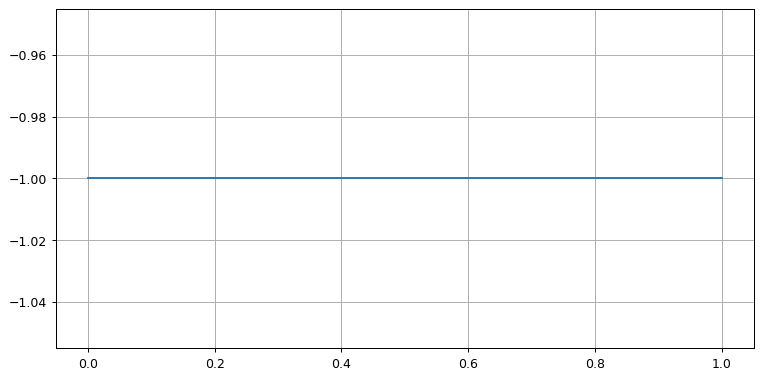

In [ ]:
u1 = 1
v1 = 0.5

u2 = -1


symbols = 2
signal = 512
plt.figure(figsize=(10,5),dpi=90)
data = np.random.choice([u1, u2], size=symbols, p=[0.5, 0.5])
message1 = data
plt.step(range(symbols), data, '-')
plt.grid()


len(data)

(1024,)


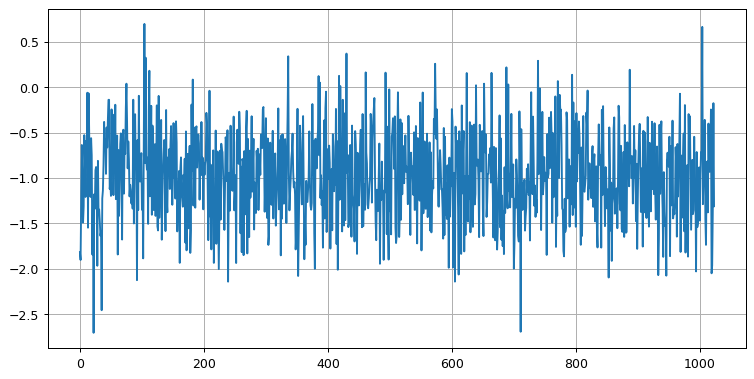

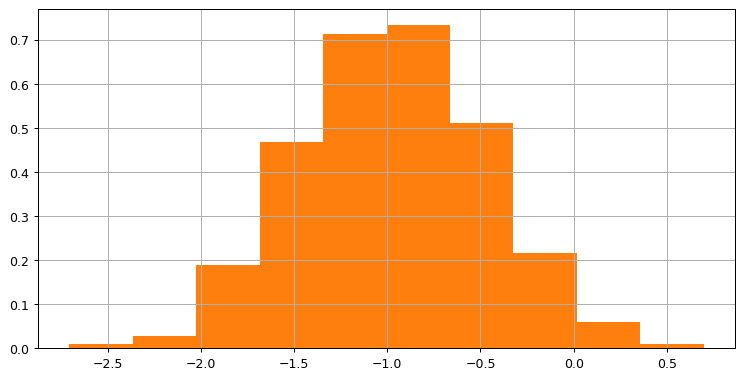

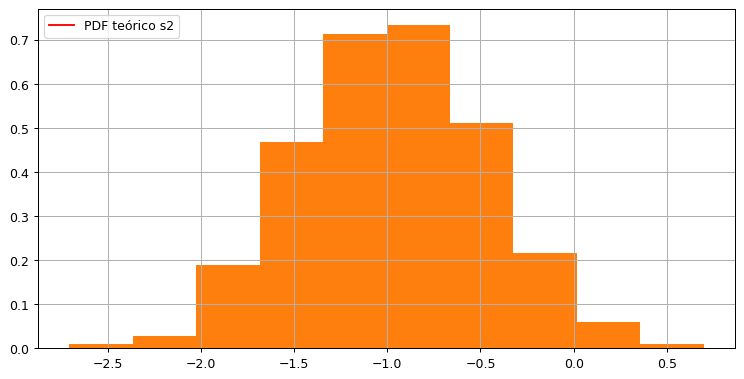

In [ ]:
import numpy as np
import scipy
import sympy as sym
import matplotlib.pyplot as plt
from scipy.stats import norm
data = np.concatenate([[v]*512 for v in data])
data = data.astype('float')

dataf = data.copy()

symbol1 = data[data==u1]
noise1 = np.random.normal(0, v1, size=symbol1.size)
data[data==u1] = symbol1 + noise1

data1=data[data==u1]

p=symbol1+noise1



symbol2 = data[data==u2]
noise2 = np.random.normal(0, v1, size=symbol2.size)
data[data==u2] = symbol2 + noise2

data2=data[data==u2]

q=symbol2+noise2

plt.figure(figsize=(10,5),dpi=90)
plt.plot(data)
plt.grid()
print(data.shape)
plt.show()

plt.figure(figsize=(10,5),dpi=90)
count, bins, ignored = plt.hist( symbol1+noise1, density=True, stacked=True) # histograma
count, bins, ignored = plt.hist( symbol2+noise2, density=True, stacked=True) # histograma
plt.grid()
plt.show()

dist = norm(loc=np.mean(symbol1+noise1), scale=np.std(symbol1+noise1))
x = np.linspace(dist.ppf(0.001),
                dist.ppf(0.999), 100)

plt.figure(figsize=(10,5),dpi=90)
plt.hist(symbol1+noise1, density=True, stacked=True)

#plt.plot(x, dist.pdf(x), "r-", label="PDF teórico s1")

dist = norm(loc=np.mean(symbol2+noise2), scale=np.std(symbol1+noise1))
x = np.linspace(dist.ppf(0.001),
                dist.ppf(0.999), 100)
plt.hist(symbol2+noise2, density=True, stacked=True)

plt.plot(x, dist.pdf(x), "r-", label="PDF teórico s2")

plt.grid()
plt.legend()
plt.show()

In [ ]:
l=np.mean(symbol1+noise1)

v=np.mean(symbol2+noise2)

u=(l+v)/2

u, v, l

(nan, -0.9803555407142183, nan)

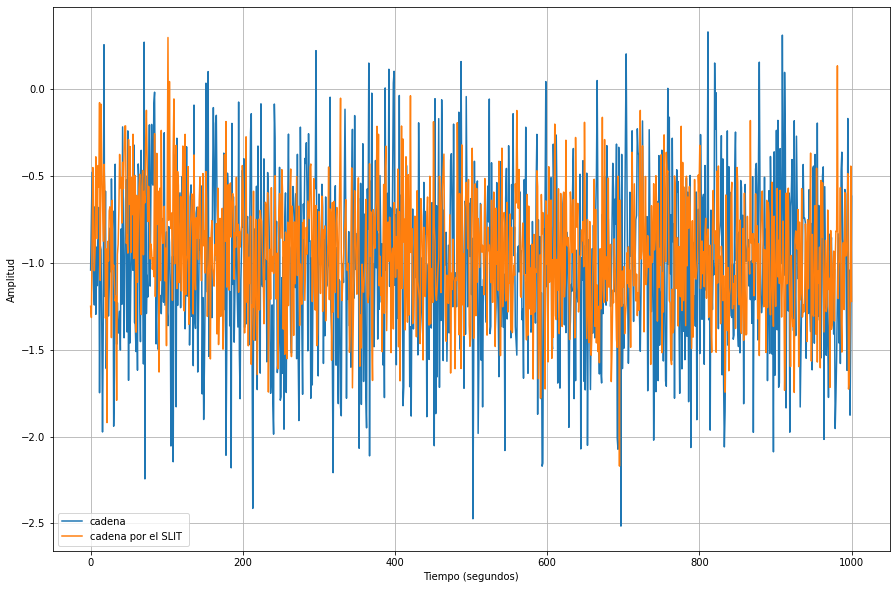

In [ ]:
_,pulrui1,_= lti_system.output(data, tn)
y, cnt = np.unique(puls, return_counts=True)
plt.figure(figsize=(15,10))

plt.plot(tn, newpul0,label="cadena")
plt.plot(tn, pulrui1,label="cadena por el SLIT ")
plt.legend()
plt.xlabel("Tiempo (segundos)")
plt.ylabel("Amplitud")
#plt.xlim(0, 0.2)
plt.grid()

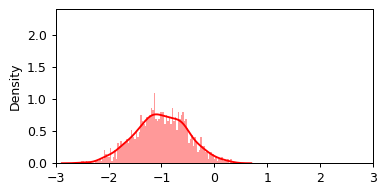

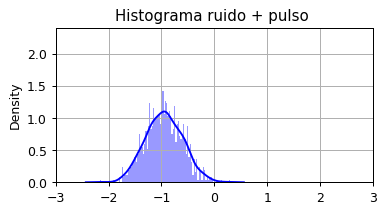

In [ ]:
import seaborn as sns, numpy as np
plt.figure(figsize=(10,5), dpi=90)
plt.subplot(221)
sns.distplot(newpul0, bins=100,color='r')
plt.xlim(-3,3)
plt.ylim(0,2.4)
plt.figure(figsize=(10,5), dpi=90)
plt.subplot(221)
sns.distplot(pulrui1, bins=100,color='b')
plt.xlim(-3,3)
plt.ylim(0,2.4)
plt.title("Histograma ruido + pulso ")
plt.grid()
plt.show()

In [ ]:
data = np.concatenate([[v]*512 for v in pulrui1])
data = data.astype('float')

dataf = pulrui1.copy()
i=0
j=512
d=np.zeros(512)
c=np.zeros(1024)
for i in range(0,512):
   d[i]=pulrui1[i]

for j in range(j,1024):
   c[j]=pulrui1[j]



In [ ]:
from math import log
v1=np.mean(d)
v2=np.mean(c)
var1=np.var(d)
var2=np.var(c)
print("medias:",v1,v2)
print("varianza:", var1, var2)
r=1
um=(((var1**2)*v2)-((var2**2)*v1)+(var1*var2)*np.sqrt((v1**2)-(v2**2)+2*(((var1**2)-(var2**2)))*np.log(r*(var2/var1))))/((var1**2)-(var2**2))
print("umbral:",um)

medias: -0.8996409510128691 -0.496462831303395
varianza: 0.12391724590327566 0.30372558857066684
umbral: -1.2992494488617232
